In [42]:
using CSV, DataFrames
using PyPlot, LaTeXStrings, PyCall
@pyimport numpy as np
@pyimport scienceplots

In [43]:
# データの読み込み
obs = CSV.read("/home/hirukawa/myenv/Lab/MPC_EF_KVLCC2.jl/observation/obs_EF.csv", DataFrame)
data = CSV.read("/home/hirukawa/myenv/Lab/MPC_EF_KVLCC2.jl/MPC/results/MPC_result1.csv", DataFrame)

duration = 50
dt = 0.5
sampling = Int(duration / dt)
whole_step = Int(duration / dt)
time_list = range(0.00, stop=duration,  step=dt)

# グラフスタイルの設定
plt.style.use(["science", "ieee"])

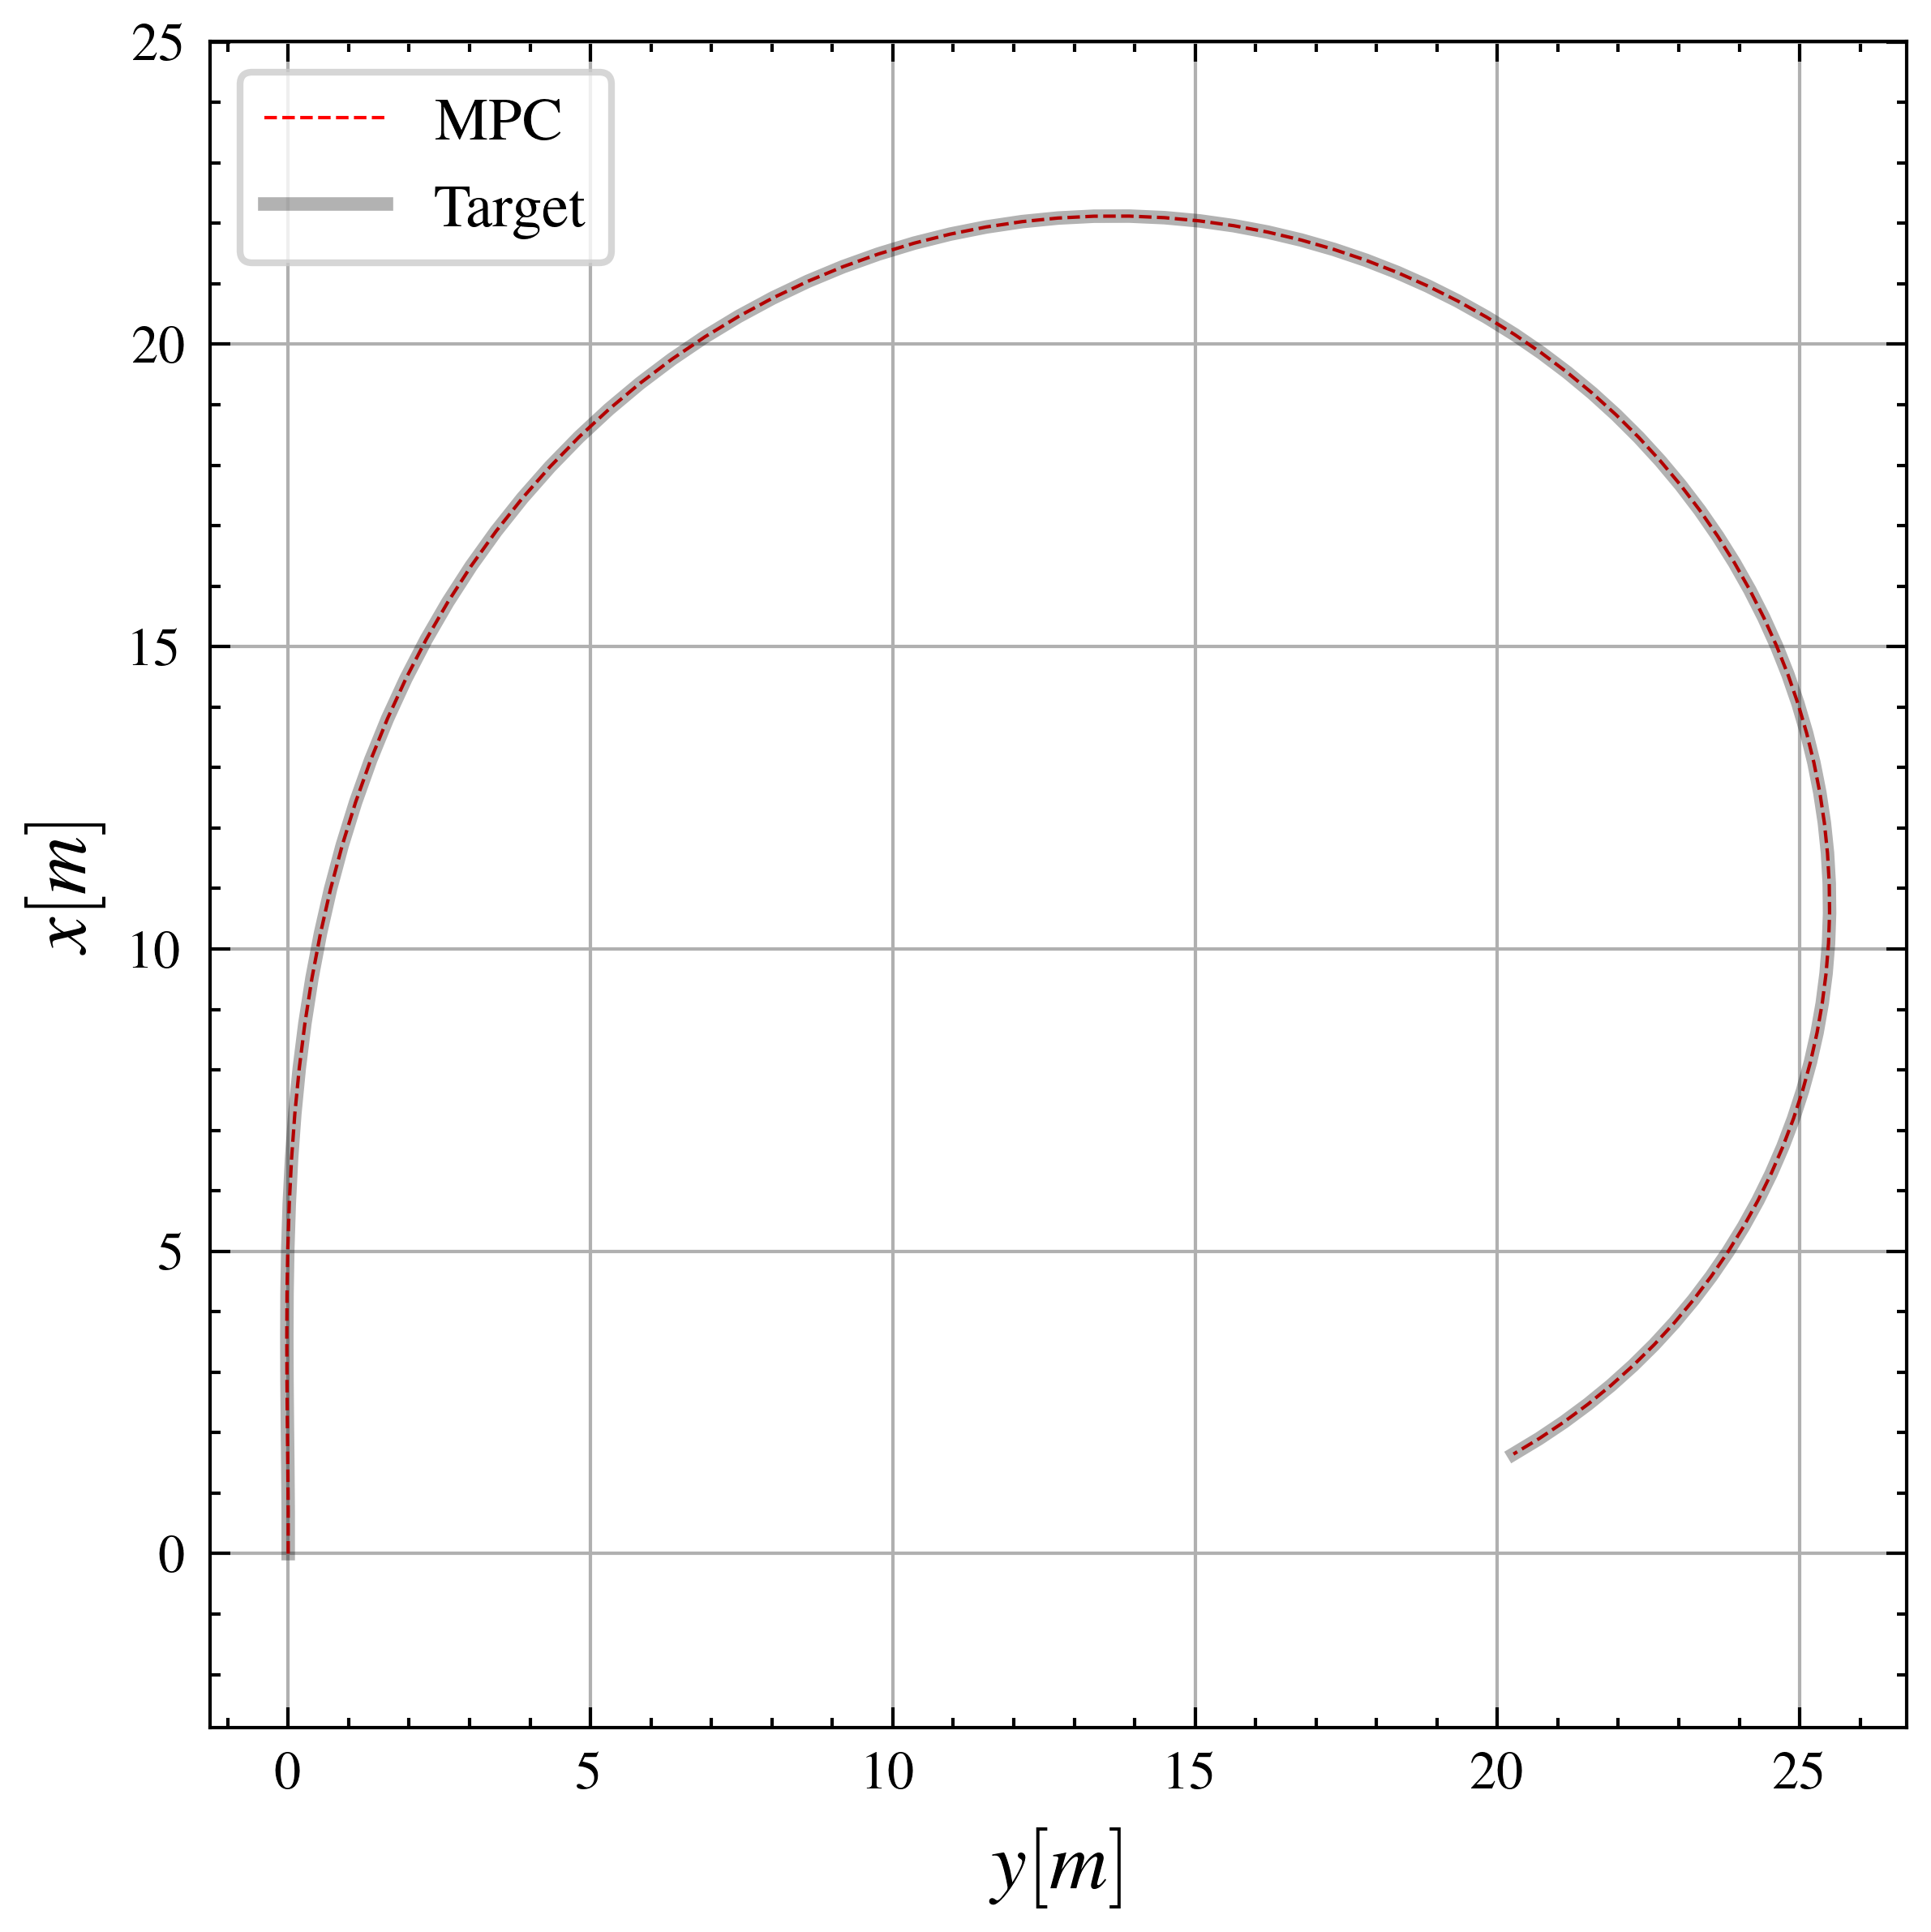

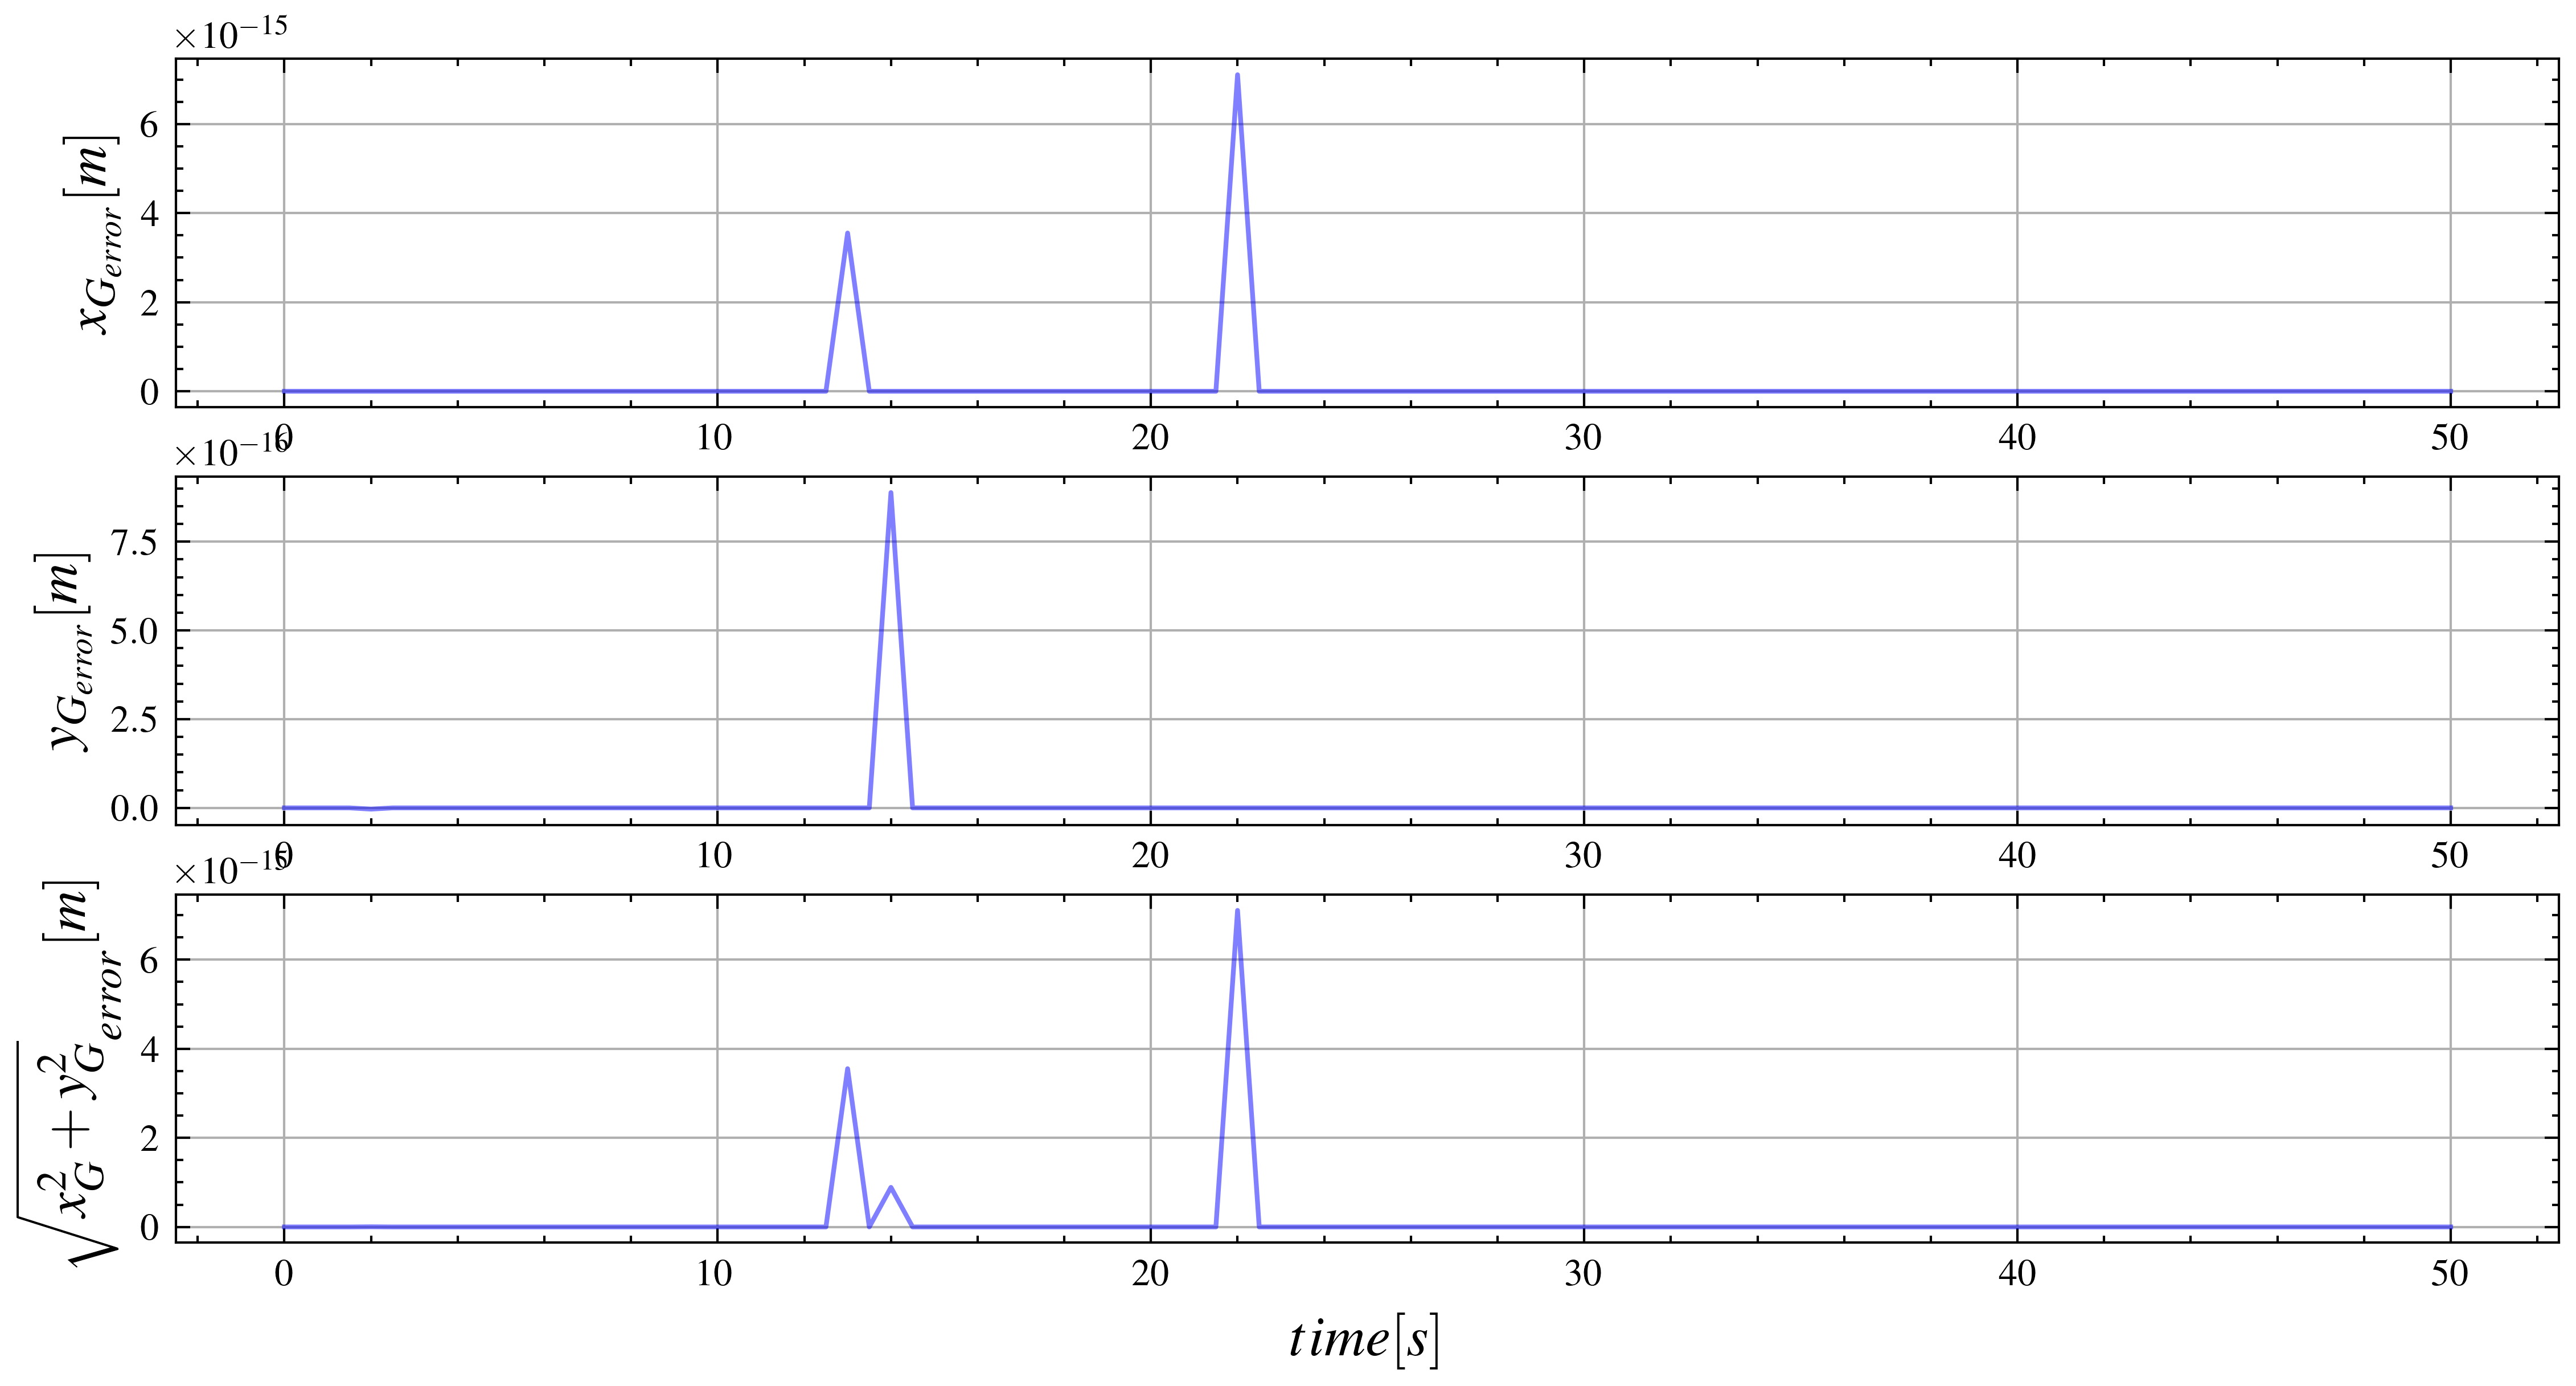

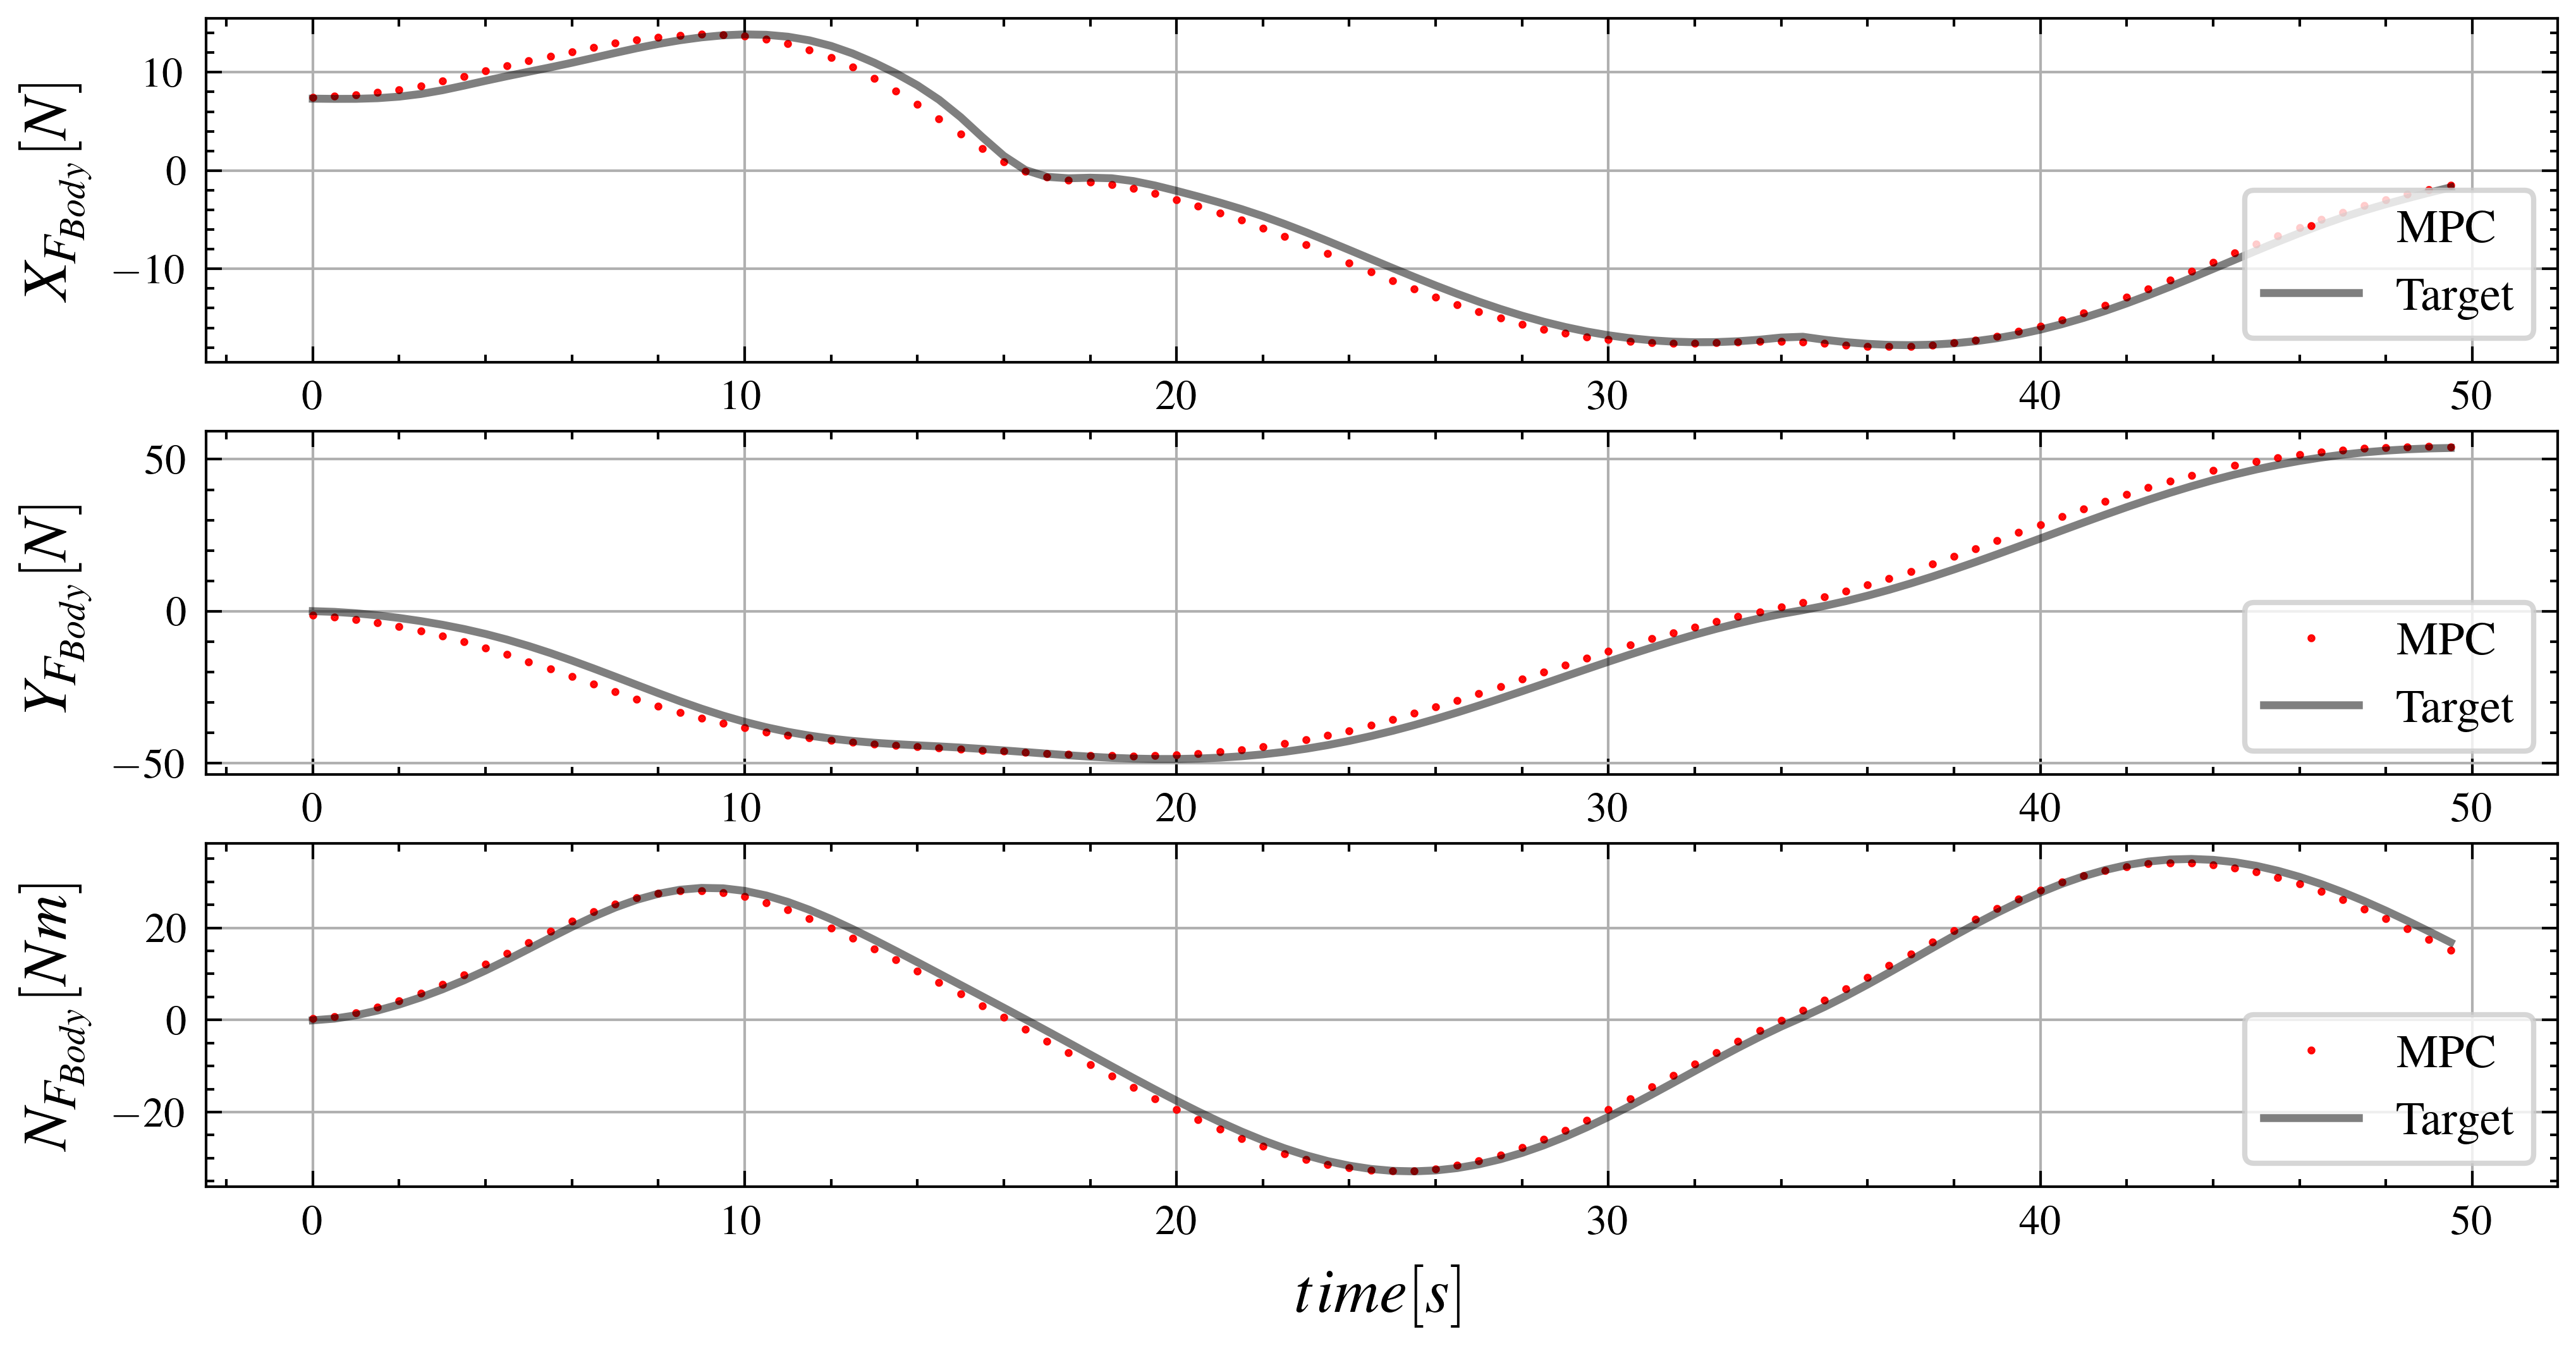

BoundsError: BoundsError: attempt to access 101×16 DataFrame at index [3:102, "ψ"]

In [47]:
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(data[1:sampling,"y"], data[1:sampling,"x"], "--", label="MPC", c="r", linewidth=0.5)
ax.plot(obs[1:sampling,"y"], obs[1:sampling,"x"], "-", label="Target", c="k", alpha=0.3, linewidth=2)
ax.set_ylabel(L"x[m]", fontsize=12)
ax.set_xlabel(L"y[m]", fontsize=12)
ax.legend(frameon=true, loc="upper left", fontsize=9)
# ax.set_ylim(0, 10)
# ax.set_xlim(-3, 12)
# ax.set_ylim(-5, 13)
# ax.set_xlim(-7, 20)
ax.axis("equal")
ax.grid()
display(fig)

fig = plt.figure(figsize=(9, 4.5))
# x
ax1 = fig.add_subplot(3, 1, 1)
ax1.plot(data[!,"time"], data[!,"x"]-obs[1:sampling+1,"x"], "-",  color="b", alpha=0.5, linewidth=1)
ax1.set_ylabel(L"x_{G_{error}}[m]", fontsize=12)
ax1.grid()
# y
ax2 = fig.add_subplot(3, 1, 2)
ax2.plot(data[!,"time"], data[!,"y"]-obs[1:sampling+1,"y"], "-",  color="b", alpha=0.5, linewidth=1)
ax2.set_ylabel(L"y_{G_{error}}[m]", fontsize=12)
ax2.grid()
# x^2+y^2
ax3 = fig.add_subplot(3, 1, 3)
ax3.plot(data[!,"time"], sqrt.((data[!,"x"].-obs[1:sampling+1,"x"]).^2+(data[!,"y"].-obs[1:sampling+1,"y"]).^2), "-", color="b", alpha=0.5, linewidth=1)
ax3.set_ylabel(L"\sqrt{x_{G}^2+y_{G}^2}_{error}[m]", fontsize=12)
ax3.grid()
ax3.set_xlabel(L"time[s]", fontsize=12)
display(fig)

fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(3, 1, 1)
# ax1.plot(data[1:sampling,"time"], data[1:sampling,"X_F"], "-", label="MPC", color="red", alpha=1.0, linewidth=1)
ax1.plot(data[1:sampling,"time"], data[1:sampling,"X_F"], ".", label="MPC", color="red", markersize=1)
ax1.plot(obs[1:sampling,"time"], obs[3:sampling+2,"X_wind"], "-", label="Target", color="k", alpha=0.5, linewidth=1.5)
ax1.set_ylabel(L"X_{F_{Body}}[N]", fontsize=12)
# ax1.set_ylim(-10, 10)
# ax1.set_ylim(-6, 6)
ax1.grid()
ax1.legend(frameon=true, loc="lower right", fontsize=9)

ax2 = fig.add_subplot(3, 1, 2)
ax2.plot(data[1:sampling,"time"], data[1:sampling,"Y_F"], ".", label="MPC", color="red", markersize=1)
# ax2.plot(data[1:sampling,"time"], data[1:sampling,"Y_F"], "-", label="MPC", color="red", alpha=1.0, linewidth=1)
ax2.plot(obs[1:sampling,"time"], obs[3:sampling+2,"Y_wind"], "-", label="Target", color="k", alpha=0.5, linewidth=1.5)
ax2.set_ylabel(L"Y_{F_{Body}}[N]", fontsize=12)
# ax2.set_ylim(-10, 10)
# ax2.set_ylim(-6, 6)
ax2.grid()
ax2.legend(frameon=true, loc="lower right", fontsize=9)
ax2.set_xlabel(L"time[s]", fontsize=12)

ax3 = fig.add_subplot(3, 1, 3)
ax3.plot(data[1:sampling,"time"], data[1:sampling,"N_F"], ".", label="MPC", color="red", markersize=1)
# ax3.plot(data[1:sampling,"time"], data[1:sampling,"N_F"], "-", label="MPC", color="red", alpha=1.0, linewidth=1)
ax3.plot(obs[1:sampling,"time"], obs[3:sampling+2,"N_wind"], "-", label="Target", color="k", alpha=0.5, linewidth=1.5)
ax3.set_ylabel(L"N_{F_{Body}}[Nm]", fontsize=12)
# ax3.set_ylim(-10, 10)
# ax3.set_ylim(-6, 6)
ax3.grid()
ax3.legend(frameon=true, loc="lower right", fontsize=9)
ax3.set_xlabel(L"time[s]", fontsize=12)
display(fig)

fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(data[1:sampling,"time"], data[1:sampling,"X_F"].*cos.(data[3:sampling+2,"ψ"]) .- data[1:sampling-1,"Y_F"].*sin.(data[1:sampling-1,"ψ"]), ".", label="MPC", color="red", markersize=1)
ax1.plot(obs[1:sampling,"time"], obs[3:sampling+2,"X_wind"].*cos.(obs[3:sampling+2,"ψ"]).-obs[3:sampling+2,"Y_wind"].*sin.(obs[3:sampling+2,"ψ"]), "-", label="Target", c="k", alpha=0.3, linewidth=1.5)
#ax1.plot(obs[2:sampling,"time"], obs[2:sampling,"X_F"].*cos.(obs[2:sampling,"ψ"]).-obs[2:sampling,"Y_F"].*sin.(obs[2:sampling,"ψ"]), "-", label="Target", c="k", alpha=0.3, linewidth=3)
ax1.set_ylabel(L"X_{F_{Earth}}[N]", fontsize=12)
# ax1.set_ylim(-15, 15)
# ax1.set_ylim(-6, 6)
ax1.grid()
ax1.legend(frameon=true, loc="lower right", fontsize=9)

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(data[1:sampling-1,"time"], data[1:sampling-1,"X_F"].*sin.(data[1:sampling-1,"ψ"]) .+ data[1:sampling-1,"Y_F"].*cos.(data[1:sampling-1,"ψ"]), ".", label="MPC", color="red", markersize=1)
ax2.plot(obs[1:sampling-1,"time"], obs[1:sampling-1,"X_wind"].*sin.(obs[1:sampling-1,"ψ"]).+obs[1:sampling-1,"Y_wind"].*cos.(obs[1:sampling-1,"ψ"]), "-", label="Target", c="k", alpha=0.3, linewidth=1.5)
ax2.set_ylabel(L"Y_{F_{Earth}}[N]", fontsize=12)
# ax2.set_ylim(-15, 15)
# ax2.set_ylim(-6, 6)
ax2.grid()
ax2.legend(frameon=true, loc="lower right", fontsize=9)
display(fig)
